### Base de dados

Este caso requer o desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing. O
conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 titulares de cartões de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis ​​comportamentais.

A seguir está o Dicionário de Dados para o conjunto de dados de Cartão de Crédito: -

CUST ID : Identificação do titular do cartão de crédito (categórico)

BALANCE : Saldo restante na conta para fazer compras 

BALANCEFREQUENCY : a frequência com que o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)

PURCHASES : Valor das compras realizadas a partir da conta COMPRAS

ONEOFF_PURCHASES : Valor máximo da compra realizada de uma só vez.

INSTALLMENTSPURCHASES : Valor da compra realizada a prazo. ADIANTAMENTO EM

CASH_ADVANCE : Antecipação dado pelo usuário

PURCHASES_FREQUENCY	: Frequência com que as compras estão sendo feitas, pontuação entre 0 e 1 (1 = frequentemente comprado, 0 = não frequentemente comprado)

ONEOFF_PURCHASES_FREQUENCY : Com que frequência as compras acontecem de uma vez (1 = frequentemente comprado, 0 = não frequentemente comprado)

PURCHASES_INSTALLMENTS_FREQUENCY : Como frequentemente compras parceladas estão sendo feitas (1 = feito com freqüência, 0 = não feito com freqüência)

CASH_ADVANCE_FREQUENCY : Como frequentemente o dinheiro com antecedência sendo pago

CASH_ADVANCE_TRX : Número de transações feitas com "Cash in Advanced"

PURCHASES_TRX : Numbe de transações de compra feito

CREDIT_LIMIT: Limite do cartão de crédito para PAGAMENTOS do usuário: Valor do pagamento feito pelo usuário

PAYMENTS: Valor do pagamento feito pelo usuário

MINIMUM_PAYMENTS : Valor mínimo dos pagamentos feitos pelo usuário

PRC_FULL_PAYMENT : Porcentagem do pagamento total pago pelo usuário

TENURE : Posse do serviço de cartão de crédito para o usuário

link:https://www.kaggle.com/arjunbhasin2013/ccdata?select=CC+GENERAL.csv

In [116]:
#Importando biblioteca
import pandas as pd
import numpy as np

In [117]:
#lendo os dados e visualizando
dados = pd.read_csv('./bases/cartao_de_credito.csv')

In [118]:
#removendo duas colunas que n serao necessárias para nossa análise
dados.drop(['CUST_ID', 'TENURE'], axis='columns', inplace=True)

In [119]:
#visualizando
dados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [120]:
dados.shape

(8950, 16)

In [121]:
#Buscando dados ausentes
ausente = dados.isna().sum()
ausente

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

temos bastante no elemento de pagamentos minimos. Portato, n vamos apagar vamos substituir esses valores na pela mediana

In [122]:
#preenchendo com a mediana
dados.fillna(dados.median(), inplace=True)

In [123]:
#verificando 
ausente = dados.isna().sum()
ausente

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Feito, nao possuimos mais dados faltantes na nossa análise.

### Normalizando os dados

In [124]:
#importando biblioteca
from sklearn.preprocessing import Normalizer

In [125]:
#normalizando a base de dados
values = Normalizer().fit_transform(dados.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


### Clusterização - utilizando KMeans    

In [126]:
#importando algoritmo
from sklearn.cluster import KMeans

In [127]:
#definindo o numero de clusters, n de vezes e variações
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

### Validação dos clusters

**Metricas**

externas : precisa ter os labels

internas : independente dos labels

#### Coeficiente de Silhuetta  

In [128]:
#importando modelo
from sklearn import metrics

In [129]:
#chamando os labels q vai atribuir os valores a cada um dos clusters específico
labels = kmeans.labels_
silhuetta = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhuetta)

0.3644635747161945


No geral o valor é bom, pois varia de -1 a 1. Se temos o valor positivo podemos considerar ele

### Centróides

Davies Bouldin

mais próximo de zero melhor

Quanto menor o valor final mais similares são os clusters.

In [130]:
#instanciondo 
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0758620069408935


**Calinski**

Dispersão dos pontos dentro dos clusters e entre clusters

In [131]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7956206905983


### Validação Relativa

comparando metricas

In [132]:
def clustering_algorithm(n_clusters, dados):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels  = kmeans.fit_predict(dados)
    s = metrics.silhouette_score(dados, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dados, labels)
    calinski = metrics.calinski_harabasz_score(dados, labels)
    return s,dbs, calinski

In [133]:
#chamando a função com a quantidade de cluster especifica 3
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272472742270084 1.308572715678932 3526.446972428308


In [134]:
#chamando a função com a quantidade de cluster especifica 5
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3644635747161945 1.0758620069408937 3431.7956206905983


In [135]:
#chamando a função com a quantidade de cluster especifica 5
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3075624506255213 1.1403247507665288 3018.0095415095616


O melhor foi com 5 clusters, olhando especialmente pelo coef. de silhuetta teve  resultado  mais alto. Com 10 tivemos perda consideravel no calinski e as métricas mesmo sendo próximas nao foi suficiente. Entao por esse motivo foi descartado

### Estrutura de clusters

gerando conjunto aleatório de dados

In [136]:
dados.shape

(8950, 16)

In [137]:
#gerando no mesmo tamanho da base
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039512430499948244 3.5205027200044796 302.1531947125672
0.3644635747161945 1.0758620069408937 3431.7956206905983


Olhando conseguimos entender que nossa selecao se comportou muito bem comparado a estrutura de dados criado na mesma dimensao que os dados orignais, entao vamos manter 5 clusters

### Validade a estabilidade do clusters

 **Dividindo  a base** e rodando o modelo em cada divisão   

In [138]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s3, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.0563346979449357 1204.111582769171
0.36711806123637947 1.139783250125324 1194.934780331434
0.36711806123637947 1.098367400389176 1167.5043802024989


Como os resultados se manteram similires, conseguimos definir também que por esse motivo nossa escolha pelo modelo e numero de clusters foram corretas

### Interpretando os resultados com gráficos

Primeiro vamos analisar o quanto o cliente comprou(PURCHASES) no cartão e o quanto ele pagou(PAYMENTS) 

In [139]:
#Importando biblitoteca
import matplotlib.pyplot as plt
import seaborn as sns

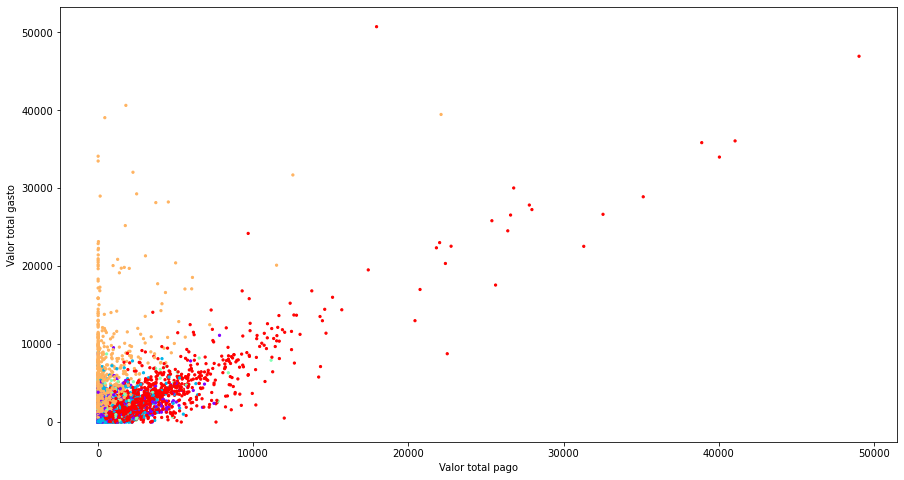

In [140]:
plt.figure(figsize=(15,8))
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c = labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")

plt.show()

#### Utilizando Seaborn

In [141]:
#Nao rodar, pois fica inviável a interpretação desta forma
dados['clusters'] = labels
#sns.pairplot(dados[0:], hue='clusters')

In [142]:
#agrupando os dados
dados.groupby("clusters").describe()

BALANCE                                                    \
           count         mean          std        min          25%   
clusters                                                             
0         2648.0  3038.132314  2479.290949   6.824905  1256.126442   
1         3278.0   443.992358   846.597972   0.000000    23.315538   
2          411.0  1987.501586  1854.459156  70.794108  1018.958891   
3         1073.0  1794.764536  1982.173844   0.000000   507.076999   
4         1540.0  1142.222657  1664.035755   0.000000   211.566656   

                                                 BALANCE_FREQUENCY            \
                  50%          75%           max             count      mean   
clusters                                                                       
0         2173.994774  4224.605542  18495.558550            2648.0  0.963768   
1           82.992153   411.193793   9630.367575            3278.0  0.774417   
2         1337.287314  2138.678431  11670.179850             411.0  0.989486   
3         1088.056301  2315.003636  14581.459140            1073.0  0.862156   
4          554.332740  1370.859355  19043.138560            1540.0  0.928053   

          ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
          ...              75%           max            count      mean   
clusters  ...                                                             
0         ...      1330.437428   8345.641905           2648.0  0.001800   
1         ...       248.800040   4483.503862           3278.0  0.246549   
2         ...      7112.618584  76406.207520            411.0  0.019318   
3         ...       886.322345  21235.065300           1073.0  0.117275   
4         ...       524.184580  18621.013310           1540.0  0.278582   

                                                       
               std  min  25%       50%       75%  max  
clusters                                               
0         0.023264  0.0  0.0  0.000000  0.000000  0.6  
1         0.346601  0.0  0.0  0.000000  0.444444  1.0  
2         0.090901  0.0  0.0  0.000000  0.000000  1.0  
3         0.186801  0.0  0.0  0.083333  0.142857  1.0  
4         0.367203  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

#### Analisando valores de cada cluster

In [143]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.04294070e-01 2.72242076e-04 6.17554553e-02 3.62405829e-02
  2.55365937e-02 2.52765717e-01 6.72943541e-05 2.57072238e-05
  4.50409323e-05 5.74261583e-05 1.15669149e-03 1.33139220e-03
  7.19260678e-01 1.66160406e-01 1.79203910e-01 5.52512128e-07]
 [6.91386971e-02 2.30552524e-04 1.21267798e-01 4.80255998e-02
  7.33425496e-02 2.43607736e-02 1.72581896e-04 3.37097813e-05
  1.40021986e-04 7.93309218e-06 1.24113667e-04 2.86037895e-03
  9.43728649e-01 1.53557708e-01 5.68217245e-02 7.57977264e-05]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [2.35317569e-01 2.16489198e-04 6.04496610e-02 3.43849416e-02
  2.60699292e-02 4.00329698e-01 5.27098698e-05 2.04691453e-05
  3.52611341e-05 6.55102544e-05 1.57205221e-03 1.12372153e-03
  5.35048542e-01 5.97748295e-01 1.04521037e-01 2.77239617e-05]
 [1.

In [144]:
#verificando a variância dos clusters
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i], "{:.4f}".format(centroids[:, i].var())) #formantando para 4casas

BALANCE 0.0224
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0196
ONEOFF_PURCHASES 0.0076
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0226
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0543
PRC_FULL_PAYMENT 0.0000


Atributos que serao tomados para decisão nos clusters

- BALANCE 0.0223
- PURCHASES 0.0197
- CASH_ADVANCE 0.0225
- CREDIT_LIMIT 0.0362
- PAYMENTS 0.0279





In [145]:
#agrupado pela variavel clusters e olhando os elementos selecionado,  analisando MÉDIA somente
description = dados.groupby('clusters')["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT","PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

              BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
clusters                                                                      
0         3038.132314   385.096760   1636.114441   4496.336858   968.599396   
1          443.992358   629.345171    141.569301   5132.945933   814.477150   
2         1987.501586   854.865815    421.129352   2227.737226  1336.238911   
3         1794.764536   475.785508   3270.705696   3975.462453  4706.788521   
4         1142.222657  3268.886929    183.019398   4097.701397  3037.241495   

          n_clients  
clusters             
0              2648  
1              3278  
2               411  
3              1073  
4              1540  


<ipython-input-145-81b5f13c297a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dados.groupby('clusters')["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT","PAYMENTS"]


#### Analisando cada clusters por atributo

- CLUSTER 0: Clientes com maiores saldos. Menor valor em compras. Valor considerável em saque. Piores pagadores %. Boa quantidade de clientes.
- CLUSTER 1: Clientes com menores saldos. Menor valor em saque. Menor valor no pagamento. Maior limite de crédito. Bom pagadores %. Maior numero de clientes.
- CLUSTER 2: Menor limite de crédito. Menor número de clientes.
- CLUSTER 3: Maior valor em saque. Maior valor em pagamento. Pagam as vezes %
- CLUSTER 4: Maior valor em compras com grande diferença.  Valor em pagamento considerável. Melhores pagadores %

In [147]:
#Trazendo percentual de pagamento para ajudar na análise
dados.groupby("clusters")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
1,3278.0,0.246549,0.346601,0.0,0.0,0.000000,0.444444,1.0
2,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
3,1073.0,0.117275,0.186801,0.0,0.0,0.083333,0.142857,1.0
4,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0


Estratégia

Aplicar TESTE A/B  separando por controle e teste e aplicar tal estratégia de negócio definida para obter resultado esperado. Ex, queremos que os clientes do CLUSTER 1 gastem mais, pois sao bom pagadores e tem o maior numero de clientes, entao separamos em controle e teste e aplicamos uma estratégia num período de 1 ano e aguardar o resultado esperado.